## Package Testing

This notebook serves to test the installation and methods of the functional_depth_methods package

In [1]:
!pip install ..
!pip list | grep statdepth

Processing /Users/julian/Documents/Projects/statdepth
  Created wheel for statdepth: filename=statdepth-0.1.0-py2.py3-none-any.whl size=10138 sha256=ded9191acf77a58f56dabec75426640a9bfcb9a86085348e92bf69c38c70d7a3
  Stored in directory: /private/var/folders/pd/jsjcl0fn7w57s5mfr34b20pm0000gn/T/pip-ephem-wheel-cache-4qtdakbo/wheels/94/78/65/e7cb177a6619a78b187853c88271a8abc224aa673b05e4ed56
Successfully built statdepth
  Attempting uninstall: statdepth
    Found existing installation: statdepth 0.1.0
    Uninstalling statdepth-0.1.0:
      Successfully uninstalled statdepth-0.1.0
statdepth                     0.1.0


In [2]:
from statdepth.depth import banddepth, samplebanddepth

import matplotlib.pyplot as plt

We generate a larger random DataFrame for testing

In [3]:
import pandas as pd 
import numpy as np

df = pd.DataFrame([
    [1, 2, 3, 4],
    [2, 2, 4, 5],
    [3, 0, 4, 6],
    [2, 2, 2, 7],
    [9, 10, 2, 4]
], columns=list('1234'))

df2 = pd.DataFrame(np.random.randint(0,2, size=(137, 4)), columns=list('ABCD'))


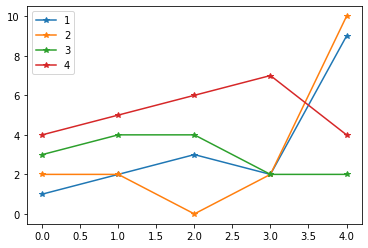

In [18]:
for col in df.columns:
    plt.plot(df[col], label=col, marker='*')
plt.legend();
plt.show();

In [7]:
banddepth([df], relax=True)

1    0.300000
2    0.233333
3    0.300000
4    0.066667
dtype: float64

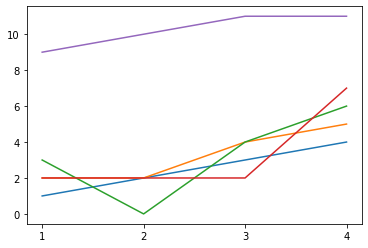

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.T);

And compute its band depth

In [10]:
banddepth(data=[df], J=3)

AttributeError: 'str' object has no attribute '_r2_containment'